<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [3]:
# Read CSV
wine_csv = 'winequality_merged.csv'
data = pd.read_csv(wine_csv)

#### 1.2 Explore Data (Exploratory Data Analysis)

In [4]:
# ANSWER
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  red_wine  
0      9.4        5         1  
1      9.8        5         1  
2      9.8        5         1  
3      9.8        6         1  
4      9.4        5         1

In [7]:
data.shape

(6497, 13)

In [9]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality     red_wine  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.246114  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.300000     6.000000     0.000000  
75%       3.320000     0.600000    11.300000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

### 2. Set Target Variable

Create a target variable for wine quality.

In [16]:
# Target Variable
y = data.quality

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [58]:
# ANSWER
predictor = ['volatile acidity', 'citric acid', 'residual sugar','chlorides','density']
X=data[predictor]

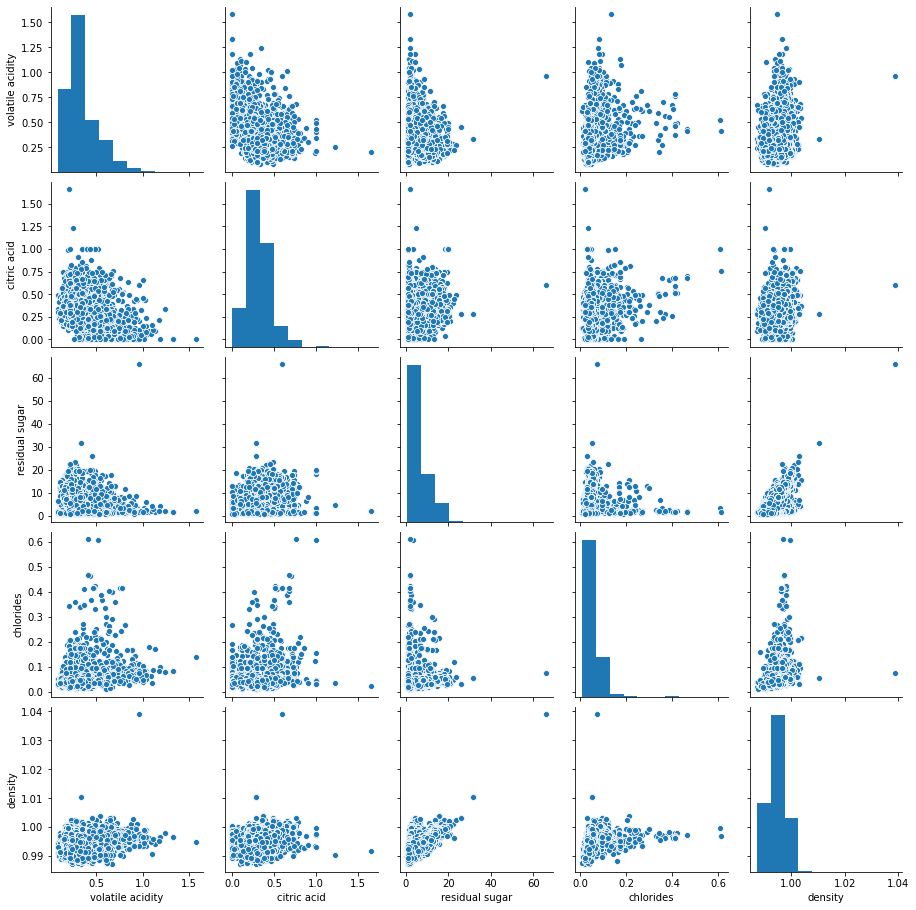

In [15]:
sns.pairplot(data[predictor])

### 4. Using Linear Regression Create a Model and Test Score

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
# Create a model for Linear Regression

reg = LinearRegression()

# Fit the model with the Training data
reg.fit(X_train,y_train)

print(reg.coef_)

# Calculate the score (R^2 for Regression) for Training Data
print(reg.score(X_train,y_train))

# Calculate the score (R^2 for Regression) for Testing Data
print(reg.score(X_test,y_test))

[-6.76193211e-01  3.44698546e-01  2.02529640e-02 -3.89885207e-01
 -9.62020608e+01]
0.1357496120534083
0.15315825650976533


In [25]:
import statsmodels.api as sm
from scipy import stats

In [26]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     163.1
Date:                Sat, 07 Nov 2020   Prob (F-statistic):          1.77e-161
Time:                        22:12:55   Log-Likelihood:                -6310.4
No. Observations:                5197   AIC:                         1.263e+04
Df Residuals:                    5191   BIC:                         1.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              101.5344      5.692  

### BONUS: Cross validation

In [30]:
X.shape

(6497, 5)

In [27]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [67]:
def lm_model(X,fold,y):

    # Set up 5-fold cross validation  
    k_fold = KFold(fold, shuffle=True)
    train_scores = []
    train_rmse = []
    test_scores = []
    test_rmse = []

    df_metric=pd.DataFrame(columns=['R_sq_train','R_sq_test','MSE_train','MSE_test'])
    for k, (train, test) in enumerate(k_fold.split(X)):

        #print(test)
        # Get training and test sets for X and y
        X_train = X.iloc[train]
        y_train = y.iloc[train]

        X_test = X.iloc[test]
        y_test = y.iloc[test]

        # Fit model with training set
        reg=LinearRegression().fit(X_train,y_train)

        # Make predictions with training and test set
        y_pred_train = reg.predict(X_train)
        y_pred_test = reg.predict(X_test)

        # Score R2 and RMSE on training and test sets and store in list
        score_train = reg.score(X_train,y_train)
        score_test = reg.score(X_test,y_test)

        mse_train= mean_squared_error(y_train,y_pred_train)
        mse_test= mean_squared_error(y_test,y_pred_test)

        #print([score_train,score_test,rmse_train,rmse_test])
    # Create a metrics_df dataframe to display r2 and rmse scores
       # df_metric.append({'R_sq_train':score_train},{'R_sq_test':score_test},{'MSE_train':mse_train},{'MSE_test':rmse_test})#
        #df_metric=df_metric.append(pd.DataFrame([score_train,score_test,mse_train,rmse_test]))
        df_metric.loc[k]=[score_train,score_test,mse_train,rmse_test]
    
    return(df_metric)



In [68]:
df_metric = lm_model(X,5,y)

In [71]:
df_metric

R_sq_train  R_sq_test  MSE_train  MSE_test
0    0.143178   0.121641   0.660618  0.644563
1    0.141702   0.128600   0.648046  0.644563
2    0.137716   0.144780   0.654586  0.644563
3    0.134480   0.158458   0.662259  0.644563
4    0.140256   0.133981   0.655045  0.644563

In [69]:
# Describe the metrics
df_metric.describe()

R_sq_train  R_sq_test  MSE_train  MSE_test
count    5.000000   5.000000   5.000000  5.000000
mean     0.139466   0.137492   0.656111  0.644563
std      0.003440   0.014451   0.005626  0.000000
min      0.134480   0.121641   0.648046  0.644563
25%      0.137716   0.128600   0.654586  0.644563
50%      0.140256   0.133981   0.655045  0.644563
75%      0.141702   0.144780   0.660618  0.644563
max      0.143178   0.158458   0.662259  0.644563

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

In [62]:
predictor = ['volatile acidity', 'citric acid', 'residual sugar','alcohol','density']
X1=data[predictor]

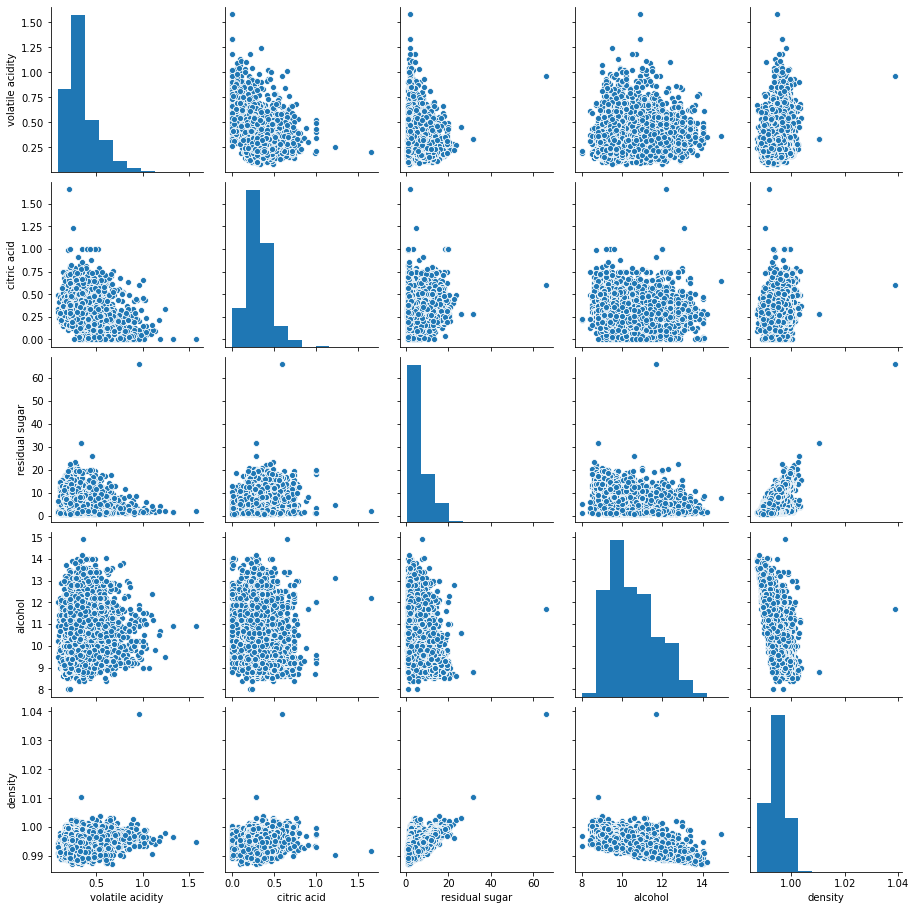

In [61]:
sns.pairplot(data[predictor])

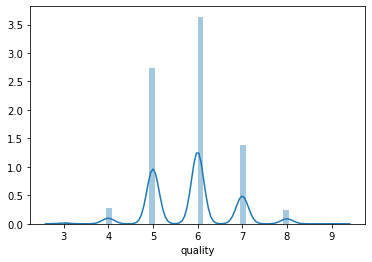

In [63]:
sns.distplot(y)

In [70]:
df_metric1 = lm_model(X1,5,y)
df_metric1

R_sq_train  R_sq_test  MSE_train  MSE_test
0    0.268224   0.271955   0.554726  0.644563
1    0.268894   0.266693   0.558671  0.644563
2    0.268903   0.269227   0.558958  0.644563
3    0.273251   0.250254   0.559440  0.644563
4    0.267318   0.270867   0.553522  0.644563

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > Â© 2019 Institute of Data


---



---



